In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import astropy.constants as astroconst
%config InlineBackend.figure_format = 'svg'
import scipy.misc

In [54]:
Ms = astroconst.M_sun.value
G = astroconst.G.value
c = astroconst.c.value
M = Ms
print(M,c,G)
rg = G*M/c**2
Rs = 2*rg
k=0
#L = 2.76e13
#r0 = 5.8e10
r0 = 3./2. * Rs
vr0 = 0

#L = r0 * 1.2e4

L = 1.6e-16 * 300*rg *c**2 
E = 1477.066699


1.9884754153381438e+30 299792458.0 6.67408e-11


4429.875114150374


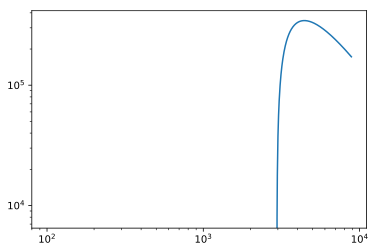

In [55]:
def V(r):
    return k*c**2/2 - G*M*k/r + L**2/(2*r**2) - G*M*L**2/(c**2*r**3)
def dVdr(r):
    return G*M*k/r**2 - L**2/r**3 + 3*G*M*L**2/(c**2*r**4)

r = np.geomspace(1e2, 2*r0,1000)
print(r0)
#plt.ylim(4e16,6e16)
plt.loglog(r,V(r))
#plt.ylim(3.98e16,4.0e16)
#plt.plot(r,dVdr(r))
#plt.plot(r,scipy.misc.derivative(V,r))#


In [56]:
# def drdtau(r):
#     return -np.sqrt((e/c)**2 - asd(r))

# def dphidtau(r):
#     return l/r**2

# def dtdtau(r):
#     return e/(1-Rs/r)/c**2
def V(r):
    return k*c**2/2 - G*M*k/r + L**2/(2*r**2) - G*M*L**2/(c**2*r**3)
def dVdr(r):
    return G*M*k/r**2 - L**2/r**3 + 3*G*M*L**2/(c**2*r**4)

def func(y,tau):
    r = y[0]
    vr = y[1]
    phi = y[2]
    t = y[3]
    drdtau = vr
    dvrdtau = -dVdr(r)
    dphidtau = L/r**2
    dtdtau = E/c**2 / (1-2*G*M/(c**2*r))
    return np.asarray([drdtau, dvrdtau, dphidtau, dtdtau])


In [74]:
tau0 = 0
tau1 = 100
nsteps = 1000
deltat = (tau1-tau0)/nsteps
tau = np.linspace(tau0,tau1,nsteps)

y0 = [r0,vr0, 0, tau0]
y,infodict = odeint(func, y0, tau, full_output = True)
#plt.plot(tau, y[:,0])
#plt.plot(tau,y[:,2])

In [75]:
infodict['hu']

array([  1.22128206e-01,   1.22128206e-01,   1.22128206e-01,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+00,   1.22128206e+00,
         1.22128206e+00,   1.22128206e+01,   1.22128206e+01,
         1.22128206e+01,   1.22128206e+01,   1.22128206e+01,
         1.22128206e+01,   1.22128206e+01,   1.22128206e+01,
         1.22128206e+01,

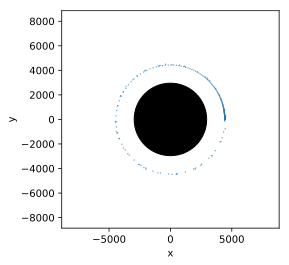

In [72]:
xcoord = y[:,0] * np.cos(y[:,1]) 
ycoord = y[:,0] * np.sin(y[:,1])
circle = plt.Circle((0, 0), Rs, color='black')
fig,ax = plt.subplots()
ax.add_artist(circle)
#xcoord = xcoord[::100]
#ycoord = ycoord[::100]

plt.scatter(xcoord,ycoord,0.1)
#xlim = np.nanmax(xcoord)
#ylim = np.nanmax(ycoord)
limit = 2*y0[0] 
plt.xlim(-limit,limit)
plt.ylim(-limit,limit)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Creating animation, this will take some time...


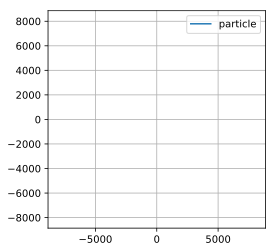

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-limit, limit), ylim=(-limit, limit))
ax.set_aspect('equal')
ax.grid()

line1, = ax.plot([], [],  ms=2,label='particle')


time_template = 'time = %.1fs'
time_text = ax.text(0, 5, '', transform=ax.transAxes)
circle = plt.Circle((0, 0), 2, color='black')
ax.add_artist(circle)


plt.legend()

def init():
    line1.set_data([], [])
    time_text.set_text('')
    return line1, time_text


def animate(i):
    if i > 10:
        line1.set_data(xcoord[i-10:i], ycoord[i-10:i])
    else:
        line1.set_data(xcoord[:i], ycoord[:i])

#    time_text.set_text(time_template % (i*deltat))
    return line1,time_text

print("Creating animation, this will take some time...")
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)
filetosave = 'bh.mp4'
ani.save(filetosave, fps=30,dpi=300, bitrate=-1)
#plt.show()


In [ ]:
y = np.loadtxt("cpp/src/Geodesic.out")
xcoord = y[:,1] * np.cos(y[:,2])
ycoord = y[:,1] * np.sin(y[:,2])
circle = plt.Circle((0, 0), 2, color='black')
fig,ax = plt.subplots()
ax.add_artist(circle)
plt.scatter(xcoord,ycoord,1.2)
#xlim = np.nanmax(xcoord)
#ylim = np.nanmax(ycoord)
limit = y0[0]
plt.xlim(-limit,limit)
plt.ylim(-limit,limit)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')